In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 1.11.0


In [2]:
def get_data():
    return pd.read_csv("./ipca.csv", header=None, delimiter=";")

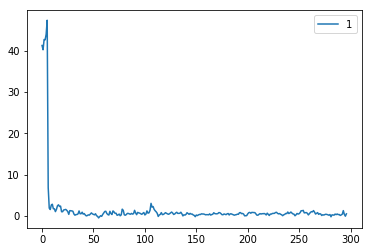

In [3]:
data = get_data()
data.plot()

In [4]:
df = pd.DataFrame()
df['t'] = data[1]
df['t+1'] = df['t'].shift(-1)
df.dropna(inplace=True)
df.head()

,t,t+1
0,41.31,40.27
1,40.27,42.75
2,42.75,42.68
3,42.68,44.03
4,44.03,47.43


In [5]:
X, y = df.values[:, :-1], df.values[:, -1]
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.33)

In [6]:
# Normalize Data
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [7]:
# build model

model = keras.Sequential()
model.add(Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=2)

Train on 158 samples, validate on 40 samples
Epoch 1/100
 - 0s - loss: 47.7626 - mean_absolute_error: 1.4160 - val_loss: 1.1052 - val_mean_absolute_error: 0.3749
Epoch 2/100
 - 0s - loss: 47.5943 - mean_absolute_error: 1.4140 - val_loss: 1.0761 - val_mean_absolute_error: 0.3731
Epoch 3/100
 - 0s - loss: 47.3833 - mean_absolute_error: 1.4114 - val_loss: 1.0473 - val_mean_absolute_error: 0.3713
Epoch 4/100
 - 0s - loss: 47.2131 - mean_absolute_error: 1.4093 - val_loss: 1.0208 - val_mean_absolute_error: 0.3696
Epoch 5/100
 - 0s - loss: 47.0402 - mean_absolute_error: 1.4071 - val_loss: 0.9960 - val_mean_absolute_error: 0.3681
Epoch 6/100
 - 0s - loss: 46.9004 - mean_absolute_error: 1.4052 - val_loss: 0.9781 - val_mean_absolute_error: 0.3672
Epoch 7/100
 - 0s - loss: 46.7635 - mean_absolute_error: 1.4034 - val_loss: 0.9646 - val_mean_absolute_error: 0.3666
Epoch 8/100
 - 0s - loss: 46.6671 - mean_absolute_error: 1.4021 - val_loss: 0.9547 - val_mean_absolute_error: 0.3665
Epoch 9/100
 - 0s -

Epoch 71/100
 - 0s - loss: 46.3038 - mean_absolute_error: 1.3231 - val_loss: 0.9097 - val_mean_absolute_error: 0.3201
Epoch 72/100
 - 0s - loss: 46.3018 - mean_absolute_error: 1.3212 - val_loss: 0.9092 - val_mean_absolute_error: 0.3191
Epoch 73/100
 - 0s - loss: 46.3020 - mean_absolute_error: 1.3230 - val_loss: 0.9080 - val_mean_absolute_error: 0.3158
Epoch 74/100
 - 0s - loss: 46.3024 - mean_absolute_error: 1.3232 - val_loss: 0.9130 - val_mean_absolute_error: 0.3272
Epoch 75/100
 - 0s - loss: 46.3032 - mean_absolute_error: 1.3256 - val_loss: 0.9084 - val_mean_absolute_error: 0.3172
Epoch 76/100
 - 0s - loss: 46.3014 - mean_absolute_error: 1.3223 - val_loss: 0.9082 - val_mean_absolute_error: 0.3164
Epoch 77/100
 - 0s - loss: 46.3030 - mean_absolute_error: 1.3241 - val_loss: 0.9113 - val_mean_absolute_error: 0.3240
Epoch 78/100
 - 0s - loss: 46.3014 - mean_absolute_error: 1.3225 - val_loss: 0.9080 - val_mean_absolute_error: 0.3156
Epoch 79/100
 - 0s - loss: 46.3019 - mean_absolute_error

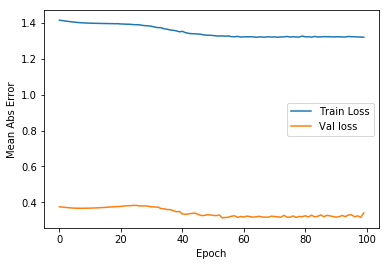

In [9]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val loss')
plt.legend()
# plt.ylim([0, 5])
plt.show()

In [10]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae))

Testing set Mean Abs Error: $   0.75


(0.08079325310869458, 1.0582256550343487)

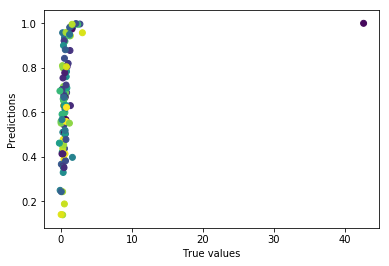

In [11]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions, c=np.random.rand(len(test_predictions)))
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('normal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

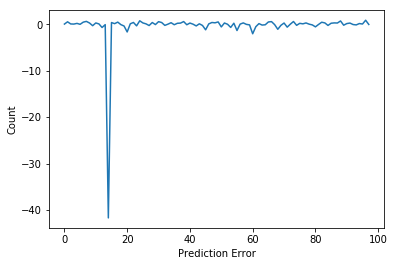

In [12]:
error = test_predictions - test_labels
plt.plot(error)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()